### Name: Eunice Adu-Agyei

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
from scipy.special import expit
from scipy.stats import logistic
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
depression = pd.read_csv("Student Depression Dataset.csv")
depression

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [3]:
depression.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
depression.describe(include = "all")

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27898.000000,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,NaN,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,3.139867,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,1.437347,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


In [5]:
len(depression)

27901

In [6]:
depression.describe(include = ["O"])

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15547,1570,27870,8310,10317,6080,17656,14398


In [7]:
depression2 = depression.dropna()
depression2

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [8]:
depression2

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [9]:
len(depression2)

27898

In [10]:
depression2.describe(include = "all")

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27898.000000,27898,27898.000000,27898,27898,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898,27898,27898,27898,27898.000000,27898.000000,27898,27898.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,NaN,15546,NaN,1570,27867,NaN,NaN,NaN,NaN,NaN,8309,10316,6080,17656,NaN,NaN,14397,NaN
mean,70442.953402,NaN,25.822174,NaN,NaN,3.141336,0.000430,7.656160,2.943974,0.000681,NaN,NaN,NaN,NaN,7.156570,3.139867,NaN,0.585526
std,40642.015063,NaN,4.905651,NaN,NaN,1.381462,0.043994,1.470708,1.361122,0.044397,NaN,NaN,NaN,NaN,3.707598,1.437347,NaN,0.492640
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35040.750000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70689.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105824.750000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


- Choose 4 columns and do the following for each of these columns:
- Plot the distribution of data in that column using an appropriate graph type. 
- Add a title and axes labels to the plot.
- Add the plot to your project page and write several sentences telling the reader what they should notice about the plot (ex. shape of distribution, outliers, skew, anything surprising, etc)
- Add your code for this step to your GitHub account.

Text(0.5, 1.0, 'Poll Results of Students and Family History of Mental Illness')

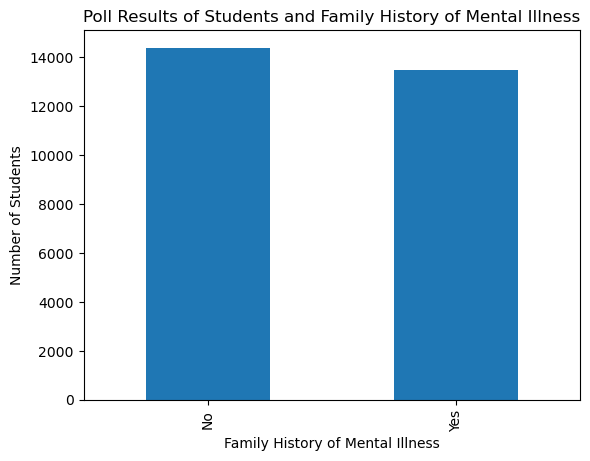

In [12]:
fam_count = depression2["Family History of Mental Illness"].value_counts()
fam_count.plot(kind = "bar")
plt.ylabel("Number of Students")
plt.title("Poll Results of Students and Family History of Mental Illness")

Text(0.5, 1.0, 'Poll Results of People with Depression')

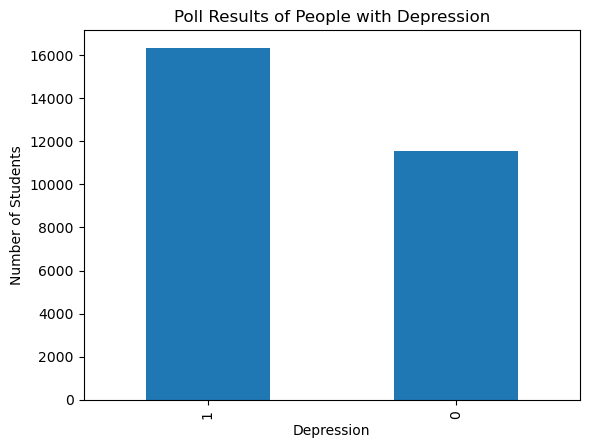

In [13]:
dep_count = depression2["Depression"].value_counts()
dep_count.plot(kind = "bar")
plt.ylabel("Number of Students")
plt.title("Poll Results of People with Depression")

Text(0.5, 1.0, 'Poll Results of People with Dietary Habits')

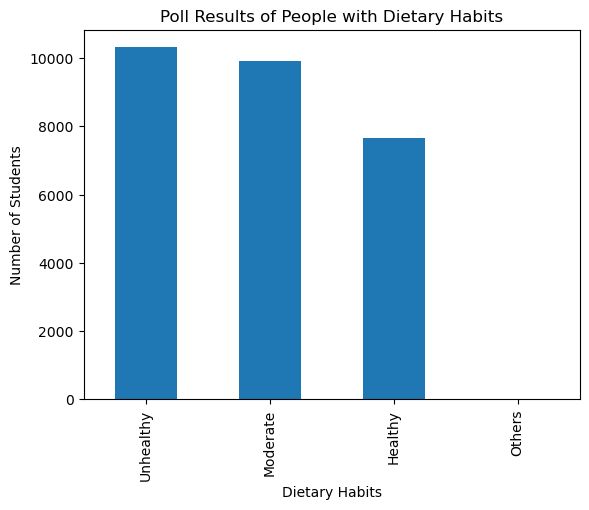

In [14]:
diet_count = depression2["Dietary Habits"].value_counts()
diet_count.plot(kind = "bar")
plt.ylabel("Number of Students")
plt.title("Poll Results of People with Dietary Habits")

Text(0.5, 1.0, 'Poll Results of People with Sucidial Thoughts')

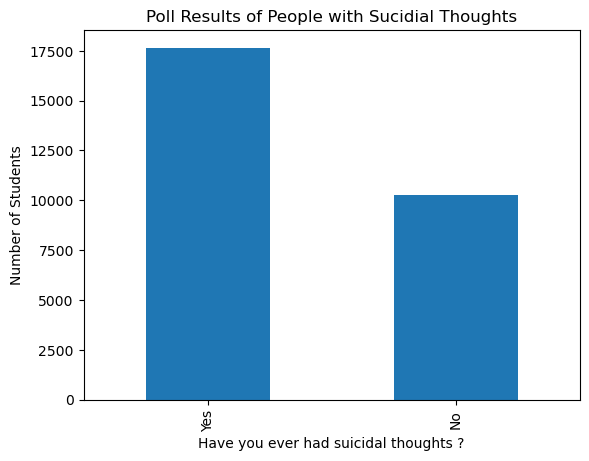

In [15]:
s_count = depression2["Have you ever had suicidal thoughts ?"].value_counts()
s_count.plot(kind = "bar")
plt.ylabel("Number of Students")
plt.title("Poll Results of People with Sucidial Thoughts")

Text(0.5, 1.0, 'Poll Results of Financial Stress')

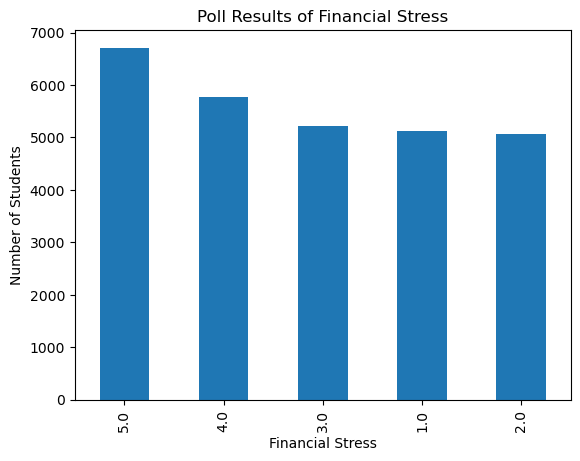

In [16]:
fin_count = depression2["Financial Stress"].value_counts()
fin_count.plot(kind = "bar")
plt.ylabel("Number of Students")
plt.title("Poll Results of Financial Stress")

Text(0.5, 1.0, 'Sleep Duration vs. CGPA')

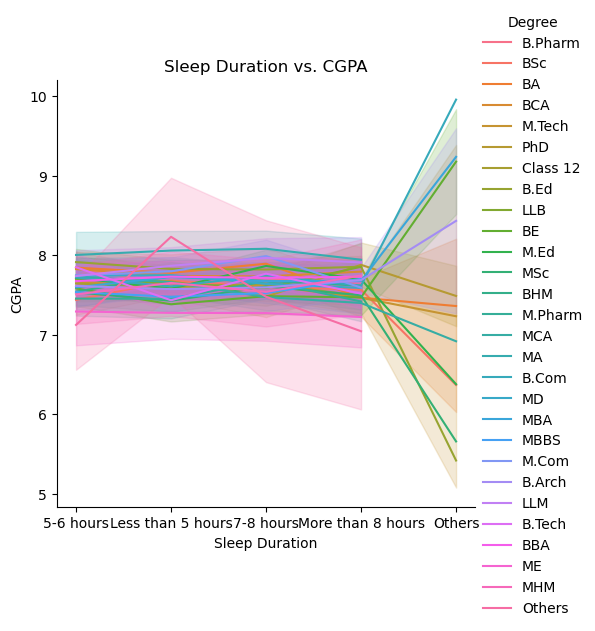

In [17]:
sns.relplot(x = "Sleep Duration", y = "CGPA", hue = "Degree", kind = "line", data = depression2)
plt.title("Sleep Duration vs. CGPA")

In [18]:
me_filter = depression2["Degree"] == "ME"
ma_filter = depression2["Degree"] == "MA"
others_filter = depression2["Degree"] == "Others"
mbbs_filter = depression2["Degree"] == "MBBS"
class12_filter = depression2["Degree"] == "Class 12"
degree5 = depression2[me_filter | ma_filter | others_filter | mbbs_filter | class12_filter]

In [19]:
degree5

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
10,83,Male,24.0,Nagpur,Student,3.0,0.0,6.10,3.0,0.0,5-6 hours,Moderate,Class 12,Yes,11.0,1.0,Yes,1
13,100,Female,19.0,Rajkot,Student,2.0,0.0,8.52,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,6.0,2.0,Yes,0
14,103,Female,19.0,Kalyan,Student,5.0,0.0,5.64,5.0,0.0,Less than 5 hours,Moderate,Class 12,Yes,4.0,5.0,Yes,1
17,132,Female,20.0,Ahmedabad,Student,5.0,0.0,7.25,3.0,0.0,5-6 hours,Healthy,Class 12,Yes,10.0,3.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27890,140635,Male,28.0,Ludhiana,Student,3.0,0.0,5.03,3.0,0.0,Less than 5 hours,Moderate,Class 12,Yes,6.0,2.0,Yes,0
27892,140669,Female,20.0,Indore,Student,3.0,0.0,7.72,5.0,0.0,Less than 5 hours,Moderate,Class 12,Yes,8.0,1.0,No,0
27894,140681,Male,23.0,Srinagar,Student,3.0,0.0,6.00,2.0,0.0,More than 8 hours,Healthy,MBBS,Yes,12.0,4.0,No,0
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0


Text(0.5, 1.0, 'Work/Study Hours vs. CGPA')

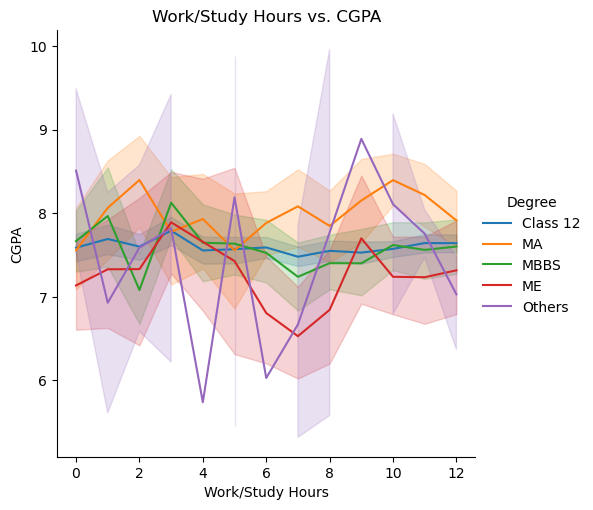

In [20]:
sns.relplot(x = "Work/Study Hours", y = "CGPA", hue = "Degree", kind = "line", data = degree5)
plt.title("Work/Study Hours vs. CGPA")

Text(0.5, 1.0, 'Work/Study Hours vs. CGPA')

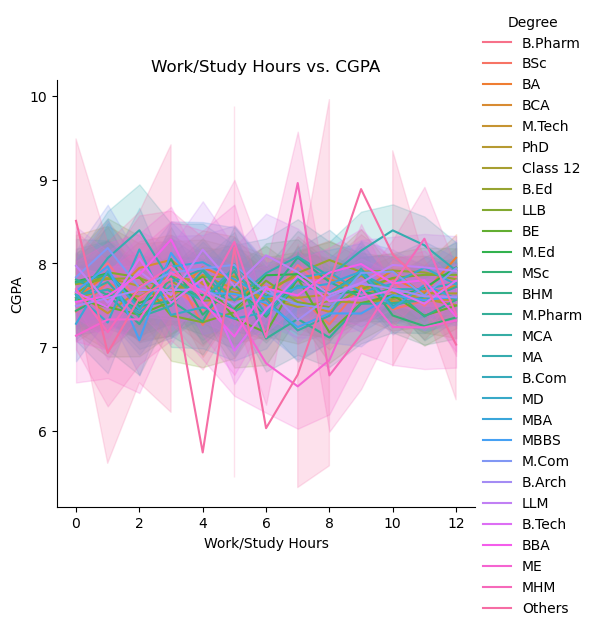

In [21]:
sns.relplot(x = "Work/Study Hours", y = "CGPA", hue = "Degree", kind = "line", data = depression2)
plt.title("Work/Study Hours vs. CGPA")

Text(0.5, 1.0, 'Study Satisfaction vs. CGPA')

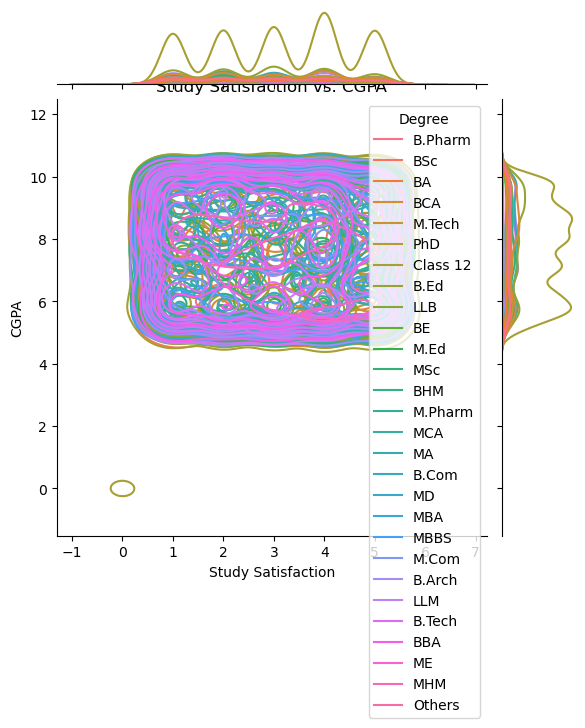

In [22]:
sns.jointplot(x = "Study Satisfaction", y = "CGPA", hue = "Degree",kind = "kde", data = depression2)
plt.title("Study Satisfaction vs. CGPA")

In [23]:
depression_filter = depression2["CGPA"] > 0
depression_filter2 = depression2[depression_filter]

Text(0.5, 1.0, 'Study Satisfaction vs. CGPA')

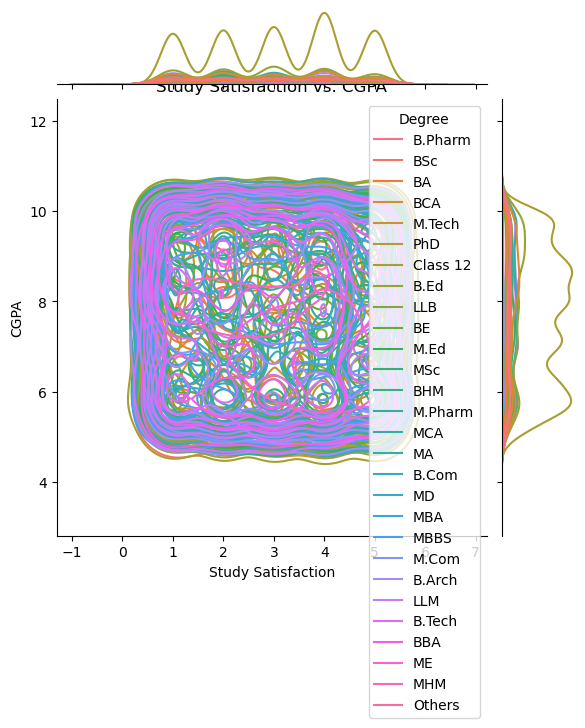

In [24]:
sns.jointplot(x = "Study Satisfaction", y = "CGPA", hue = "Degree",kind = "kde", data = depression_filter2)
plt.title("Study Satisfaction vs. CGPA")

In [25]:
gpa_filter = depression2[(depression2["CGPA"] >= 0.0) & (depression2["CGPA"] <= 10.00) & (depression2["Academic Pressure"] < 5.0 )]
gpa_filter

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,140681,Male,23.0,Srinagar,Student,3.0,0.0,6.00,2.0,0.0,More than 8 hours,Healthy,MBBS,Yes,12.0,4.0,No,0
27895,140684,Male,31.0,Lucknow,Student,2.0,0.0,7.27,5.0,0.0,7-8 hours,Moderate,B.Com,Yes,6.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0


Text(0.5, 1.0, 'Academic Pressure vs. CGPA')

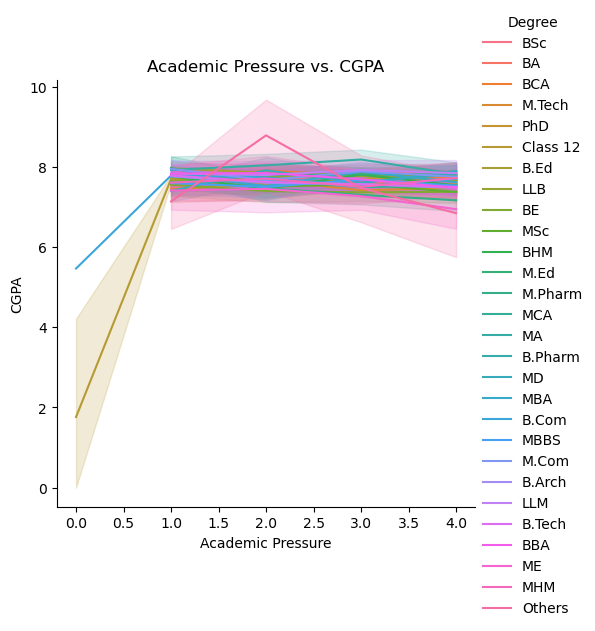

In [26]:
sns.relplot(x ="Academic Pressure", y = "CGPA", hue = "Degree", data = gpa_filter, kind = "line")
plt.title("Academic Pressure vs. CGPA")

Text(0.5, 1.0, 'Academic Pressure vs. CGPA')

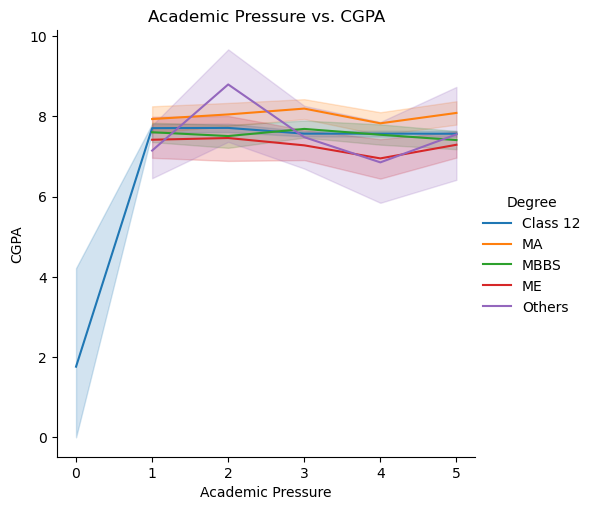

In [27]:
sns.relplot(x ="Academic Pressure", y = "CGPA", hue = "Degree", data = degree5, kind = "line")
plt.title("Academic Pressure vs. CGPA")

Text(0.5, 1.0, 'Sleep Duration vs. CGPA')

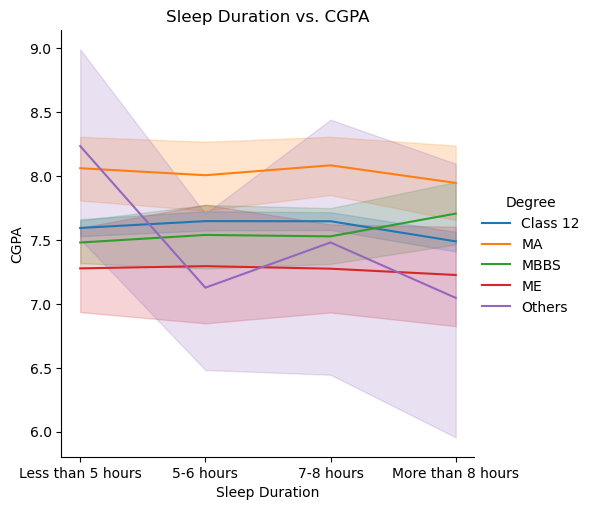

In [30]:
sns.relplot(x = "Sleep Duration", y = "CGPA", hue = "Degree", kind = "line", data = degree5)
plt.title("Sleep Duration vs. CGPA")

Text(0.5, 1.0, 'Suicidal Thoughts and Depression Effects in Age')

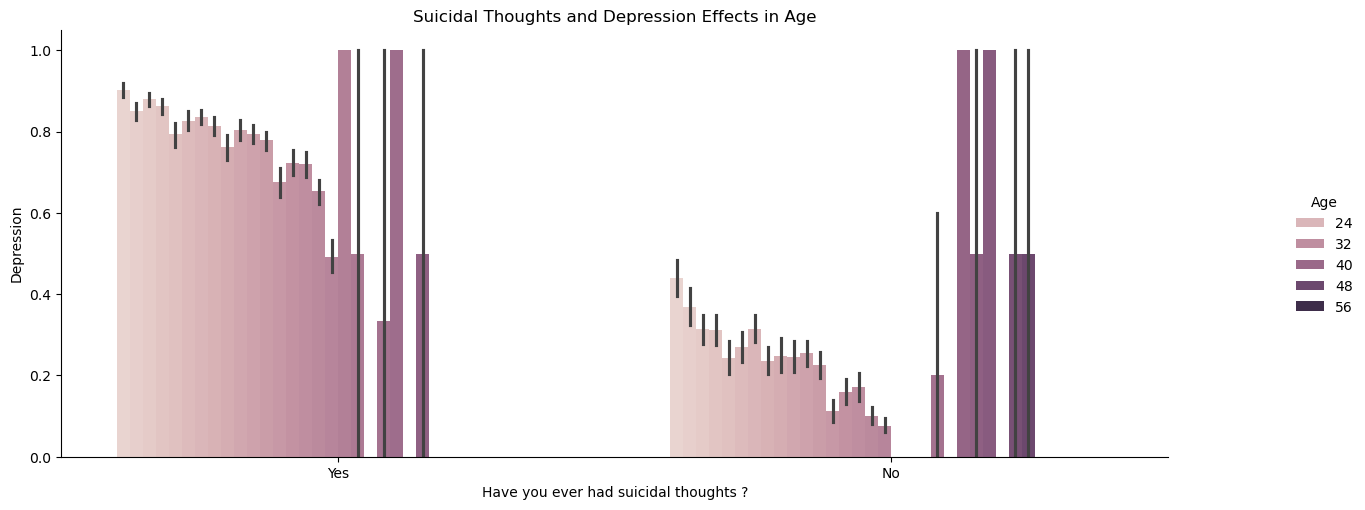

In [34]:
h = sns.catplot(x = "Have you ever had suicidal thoughts ?", y = "Depression", hue = "Age", kind = "bar", data = depression2)
h.fig.set_size_inches(15,5)
plt.title("Suicidal Thoughts and Depression Effects in Age")

a) Choose a column in your dataset to predict using some or all of the other columns.. This can either be a quantitative column to perform regression on, or a qualitative column to perform classification on.

b) Prepare your data for machine learning:  split your data into training and testing data, and if necessary, create dummy variables or scale columns.

c) Fit a model that we covered in class to your training data.   The models covered in class are linear regression, polynomial regression, decision trees, k-nearest neighbors, and logistic regression.

d) Evaluate the fit of your model using your testing and training data.  You should use the appropriate methods for your model.

e) Repeat steps (c) and (d) with at least two different parameters for your model.  For linear regression, you should use different subsets of the independent variables (for example, by dropping independent variables with high p-values).

f) Post your code to GitHub.

g) Describe what prediction model and parameters you tried on your project page, as well as how you evaluated the model/parameter combinations and the results of the evaluation (ex. pros and cons of this model/parameter combo).  Conclude with recommending which parameter to use with this model to get the best predictions for your data.

In [41]:
depression3 = pd.get_dummies(depression2, columns = ["Gender","Have you ever had suicidal thoughts ?","Family History of Mental Illness","Sleep Duration"], drop_first = True)

In [42]:
depression3.head(10)

,id,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,...,Work/Study Hours,Financial Stress,Depression,Gender_Male,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others
0,2,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,Healthy,...,3.0,1.0,1,True,True,False,False,False,False,False
1,8,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,Moderate,...,3.0,2.0,0,False,False,True,False,False,False,False
2,26,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Healthy,...,9.0,1.0,0,True,False,True,False,True,False,False
3,30,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,Moderate,...,4.0,5.0,1,False,True,True,True,False,False,False
4,32,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,Moderate,...,1.0,1.0,0,False,True,False,False,False,False,False
5,33,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Healthy,...,4.0,1.0,0,True,False,False,False,True,False,False
6,52,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,Healthy,...,1.0,2.0,0,True,False,False,True,False,False,False
7,56,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Unhealthy,...,0.0,1.0,0,False,False,True,False,True,False,False
8,59,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,Moderate,...,12.0,3.0,1,True,True,False,True,False,False,False
9,62,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Moderate,...,2.0,5.0,1,True,True,False,False,True,False,False


In [44]:
depression3.columns

Index(['id', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure',
       'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Dietary Habits',
       'Degree', 'Work/Study Hours', 'Financial Stress', 'Depression',
       'Gender_Male', 'Have you ever had suicidal thoughts ?_Yes',
       'Family History of Mental Illness_Yes', 'Sleep Duration_7-8 hours',
       'Sleep Duration_Less than 5 hours', 'Sleep Duration_More than 8 hours',
       'Sleep Duration_Others'],
      dtype='object')

In [46]:
logit_model = smf.logit('Depression ~ Q("Sleep Duration_7-8 hours") + Q("Sleep Duration_Less than 5 hours") + Q("Sleep Duration_More than 8 hours") + Q("Sleep Duration_Others") + Q("Work/Study Hours") + Q("Academic Pressure") + Q("Financial Stress") + Q("Study Satisfaction") + Q("CGPA")', depression3).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.473531
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                27898
Model:                          Logit   Df Residuals:                    27888
Method:                           MLE   Df Model:                            9
Date:                Sat, 26 Apr 2025   Pseudo R-squ.:                  0.3020
Time:                        00:54:02   Log-Likelihood:                -13211.
converged:                       True   LL-Null:                       -18927.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -4.5749      0.115    -39.824      0.000      -4.800      -4.350
Q("Sleep Duration_7-8 hours")[T.True]             0.1157      0.043      2.663      0.008       0.031       0.201
Q("Sleep Duration_Less than 5 hours")[T.True]     0.3887      0.043      9.062      0.000       0.305       0.473
Q("Sleep Duration_More than 8 hours")[T.True]    -0.2321      0.045     -5.111      0.000      -0.321      -0.143
Q("Sleep Duration_Others")[T.True]               -0.0856      0.553     -0.155      0.877      -1.169       0.997
Q("Work/Study Hours")                             0.1168      0.004     28.084      0.000       0.109       0.125
Q("Academic Pressure")                            0.8292      0.012     66.527      0.000       0.805       0.854
Q("Financial Stress")                             0.5782      0.011     51.537      0.000       0.556       0.600
Q("Study Satisfaction")                          -0.2200      0.011    -19.396      0.000      -0.242      -0.198
Q("CGPA")                                         0.0503      0.010      4.849      0.000       0.030       0.071
=================================================================================================================
"""

In [48]:
x = depression3.drop(columns = ["Degree","City","Dietary Habits","Depression","Dietary Habits","Profession"])
x

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_Male,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,True,True,False,False,False,False,False
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,False,False,True,False,False,False,False
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,True,False,True,False,True,False,False
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,False,True,True,True,False,False,False
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,False,True,True,False,False,False,False
27897,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,True,False,True,False,True,False,False
27898,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,True,False,False,False,False,False,False
27899,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,False,True,False,False,True,False,False


In [50]:
y = depression2["Depression"]
y

0        1
1        0
2        0
3        1
4        0
        ..
27896    0
27897    0
27898    0
27899    1
27900    1
Name: Depression, Length: 27898, dtype: int64

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [53]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [54]:
y_test_pred = knn.predict(x_test)

In [55]:
mean_squared_error(y_test, y_test_pred)

0.27424109428717725

In [56]:
y_train_pred = knn.predict(x_train)

In [57]:
mean_squared_error(y_train, y_train_pred)

0.20514968241979112

In [58]:
confusion_matrix = logit_model.pred_table()
confusion_matrix

array([[ 8037.,  3526.],
       [ 2676., 13659.]])

In [59]:
confusion_matrix[0][0]

8037.0

In [60]:
confusion_matrix[0][1]

3526.0

In [61]:
confusion_matrix[1][0]

2676.0

In [62]:
confusion_matrix[1][1]

13659.0

In [63]:
true_neg = confusion_matrix[0][0]
false_neg = confusion_matrix[1][0]
false_pos = confusion_matrix[0][1]
true_pos = confusion_matrix[1][1]

In [64]:
sensitivity = true_pos/(true_pos + false_neg)
sensitivity

0.8361799816345271

In [65]:
specificity = true_neg/(true_neg + false_pos)
specificity

0.6950618351638848

In [66]:
accuracy = (true_pos + true_neg)/len(depression3)
accuracy

0.7776901570005018

In [67]:
precision = true_pos/(true_pos + false_pos)
precision

0.7948210648821646

In [68]:
logit_model2 = smf.logit('Depression ~ Q("Work/Study Hours") + Q("Academic Pressure") + Q("Financial Stress") + Q("Study Satisfaction") + Q("CGPA")', depression3).fit()
logit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.477445
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                27898
Model:                          Logit   Df Residuals:                    27892
Method:                           MLE   Df Model:                            5
Date:                Sat, 26 Apr 2025   Pseudo R-squ.:                  0.2963
Time:                        00:54:05   Log-Likelihood:                -13320.
converged:                       True   LL-Null:                       -18927.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.4786      0.110    -40.623      0.000      -4.695      -4.263
Q("Work/Study Hours")       0.1171      0.004     28.311      0.000       0.109       0.125
Q("Academic Pressure")      0.8288      0.012     66.832      0.000       0.804       0.853
Q("Financial Stress")       0.5733      0.011     51.425      0.000       0.551       0.595
Q("Study Satisfaction")    -0.2201      0.011    -19.504      0.000      -0.242      -0.198
Q("CGPA")                   0.0516      0.010      4.995      0.000       0.031       0.072
===========================================================================================
"""

In [69]:
confusion_matrix2 = logit_model2.pred_table()
confusion_matrix2

array([[ 8019.,  3544.],
       [ 2646., 13689.]])

In [70]:
confusion_matrix2[0][0]

8019.0

In [71]:
confusion_matrix2[0][1]

3544.0

In [75]:
confusion_matrix2[1][0]

2646.0

In [76]:
confusion_matrix2[1][1]

13689.0

In [77]:
sensitivity = true_pos/(true_pos + false_neg)
sensitivity

0.8361799816345271

In [78]:
specificity = true_neg/(true_neg + false_pos)
specificity

0.6950618351638848

In [79]:
accuracy = (true_pos + true_neg)/len(depression3)
accuracy

0.7776901570005018

In [80]:
precision = true_pos/(true_pos + false_pos)
precision

0.7776901570005018

In [81]:
logit_model3 = smf.logit('Depression ~ Q("Work/Study Hours") + Q("Academic Pressure") + Q("Financial Stress") + Q("Study Satisfaction") + Q("CGPA") + Q("Gender_Male")', depression3).fit()
logit_model3.summary()

Optimization terminated successfully.
         Current function value: 0.477401
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                27898
Model:                          Logit   Df Residuals:                    27891
Method:                           MLE   Df Model:                            6
Date:                Sat, 26 Apr 2025   Pseudo R-squ.:                  0.2963
Time:                        00:54:05   Log-Likelihood:                -13319.
converged:                       True   LL-Null:                       -18927.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.5030      0.111    -40.424      0.000      -4.721      -4.285
Q("Gender_Male")[T.True]     0.0477      0.031      1.563      0.118      -0.012       0.108
Q("Work/Study Hours")        0.1170      0.004     28.280      0.000       0.109       0.125
Q("Academic Pressure")       0.8293      0.012     66.836      0.000       0.805       0.854
Q("Financial Stress")        0.5734      0.011     51.432      0.000       0.552       0.595
Q("Study Satisfaction")     -0.2198      0.011    -19.475      0.000      -0.242      -0.198
Q("CGPA")                    0.0510      0.010      4.938      0.000       0.031       0.071
============================================================================================
"""

In [127]:
confusion_matrix3 = logit_model3.pred_table()
confusion_matrix3

array([[ 8023.,  3540.],
       [ 2649., 13686.]])

In [129]:
confusion_matrix3[0][0]

8023.0

In [131]:
confusion_matrix3[0][1]

3540.0

In [133]:
confusion_matrix3[1][0]

2649.0

In [135]:
confusion_matrix3[1][1]

13686.0

In [137]:
sensitivity = true_pos/(true_pos + false_neg)
sensitivity

0.8361799816345271

In [139]:
specificity = true_neg/(true_neg + false_pos)
specificity

0.6950618351638848

In [141]:
accuracy = (true_pos + true_neg)/len(depression3)
accuracy

0.7776901570005018

In [143]:
precision = true_pos/(true_pos + false_pos)
precision

0.7948210648821646